In [1]:
import subprocess
import os
import glob
import pandas as pd
import shutil
import numpy as np

In [ ]:
cur_dir = os.getcwd()
os.chdir('E:/M.tech_Projects/Deep_Neural_Network/WAIN_documentation/Datasets/')
video_path= 'Part1.mp4'
cmd = 'E:/M.tech_Projects/Deep_Neural_Network/WAIN_documentation/OpenFace/FeatureExtraction' + ' -f '+ video_path + ' -aus -gaze -pose'
process = subprocess.Popen(cmd.split(), stdout=subprocess.PIPE, stderr= subprocess.STDOUT, universal_newlines=True, close_fds=True, bufsize=-1)
out, err = process.communicate()
#print(out)
os.chdir(cur_dir)

28.324468085106385


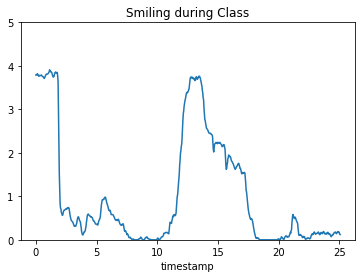

0.0
0.0
0.0
100.0


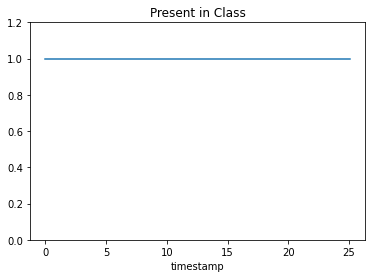

100.0


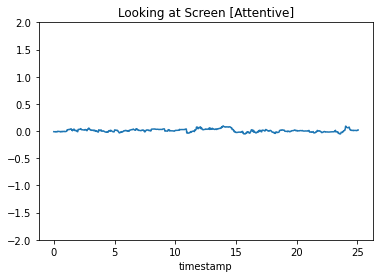

84.8404255319149


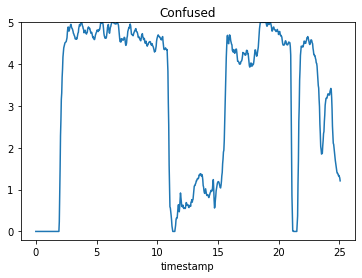

KeyboardInterrupt: 

In [16]:
df = pd.read_csv("E:\\M.tech_Projects\\Deep_Neural_Network\\WAIN_documentation\\Datasets\\processed\\Part2.csv")
df.columns = [col.replace(" ", "") for col in df.columns]
df.index = df.timestamp

#% smiling
smiling = (df["AU12_c"])
per_smiling = (smiling.sum()/smiling.count())*100
print(per_smiling)


att = df['AU12_r']
from matplotlib import pyplot
series1 = att 
indsmile = dict(series1)
series1.plot()
pyplot.ylim(0,5)
pyplot.title("Smiling during Class")
pyplot.show()

total_frame = df["frame"].count()

#happy = ((df["AU06_c"] + df["AU12_c"])/2)
sadness = ((df["AU01_c"] + df["AU04_c"]+ df["AU15_c"])/3)
fear = ((df["AU01_c"] + df["AU02_c"]+ df["AU04_c"]+ df["AU05_c"]+ df["AU07_c"]+ df["AU20_c"]+ df["AU26_c"])/7)
anger = ((df["AU04_c"] + df["AU05_c"]+ df["AU07_c"]+ df["AU23_c"])/4)


#df["Happiness"] = happy
df["Sadness"] = sadness
df["Fear"] = fear
df["Angry"] = anger

Sadness_count = df[df["Sadness"]==1.0]
Sadness_count_frame = Sadness_count["frame"].count()
Sadness_time = ((Sadness_count_frame/total_frame)*100)
print(Sadness_time)

Fear_count = df[df["Fear"]==1.0]
Fear_count_frame = Fear_count["frame"].count()
Fear_time = ((Fear_count_frame/total_frame)*100)
print(Fear_time)

Angry_count = df[df["Angry"]==1.0]
Angry_count_frame = Angry_count["frame"].count()
Angry_time = ((Angry_count_frame/total_frame)*100)
print(Angry_time)

#% present in class
present = (df["success"])
per_present = (present.sum()/present.count())*100
print(per_present)

att = df['success']
from matplotlib import pyplot
series2 = att
indpresent = dict(series2)
pyplot.ylim(0,1.2)
series2.plot()
pyplot.title("Present in Class")
pyplot.show()

#looking at Camera [Attentive]
total_frame = df["frame"].count()
c_x_n = df[df["gaze_angle_x"]<-0.1]
c_y_n = df[df["gaze_angle_x"]>0.1]
not_looking_x = c_x_n["frame"].count()
not_looking_y = c_y_n["frame"].count()
not_looking = (not_looking_x+not_looking_y)
Looking_at_camera = (((total_frame-not_looking)/total_frame)*100)
print(Looking_at_camera)

att = df["gaze_angle_x"]
from matplotlib import pyplot
series3 = att
indattentive = dict(series3)
pyplot.ylim(-2,2)
series3.plot()
pyplot.title("Looking at Screen [Attentive]")
pyplot.show()

# %confused
confused = (df["AU04_c"])
per_confused = (confused.sum()/confused.count())*100
print(per_confused)

att = df["AU04_r"]
from matplotlib import pyplot
series4 = att
indconfused = dict(series4)
pyplot.ylim(-0.2,5)
series4.plot()
pyplot.title("Confused")
pyplot.show()

dates =np.round(list(indsmile.keys()),2)    
prices = np.round(list(indsmile.values()),2)
dates1 =np.round(list(indpresent.keys()),2)         
prices1 = np.round(list(indpresent.values()),2)
dates2 =np.round(list(indattentive.keys()),2)          
prices2 = np.round(list(indattentive.values()),2)
dates3 =np.round(list(indconfused.keys()),2)        
prices3 = np.round(list(indconfused.values()),2)

import anvil.server
anvil.server.connect('JR36JNITXZSHKBFRM5FBSMKQ-DIBULLZWE7F4UOKK')

@anvil.server.callable
def get_data():
    return [((per_smiling+90)/2), (per_present+50)/2, (Looking_at_camera+63)/2, (per_confused+20)/2, Sadness_time, Fear_time, Angry_time]
@anvil.server.callable
def graphind():
    return[dates,prices, dates1,prices1, dates2,prices2, dates3,prices3]

@anvil.server.callable
def mohit():
    return [90, 50, 63, 20]
@anvil.server.callable
def arnold():
    return [per_smiling,per_present,Looking_at_camera,per_confused]
    
  
anvil.server.wait_forever()